In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

plt.rcParams['figure.figsize'] = [45,30]
plt.rc('font', size = 20)
import warnings
warnings.filterwarnings('ignore')

In [2]:
appl = pd.read_csv("/Users/kundaimariga/Downloads/AAPL.csv")

In [3]:
appl = appl.astype({'Date': 'datetime64[ns]'})

In [4]:
appl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800
...,...,...,...,...,...,...,...
2763,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2764,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2765,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200
2766,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.239273,121047300


In [5]:
#load tweet polarity data
appltweets = pd.read_csv("/Users/kundaimariga/Downloads/AAPL-5.csv")

In [6]:
appltweets

,date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430
...,...,...,...
1336,2019-08-29,0.056460,1083
1337,2019-08-30,0.106096,1005
1338,2019-08-31,0.151625,224
1339,2019-09-01,0.059887,200


In [7]:
#need to rename data column so that I can merge it with the stock data
appltweets = appltweets.rename(columns={'date': 'Date'})

In [8]:
appltweets = appltweets.astype({'Date': 'datetime64[ns]'})

In [9]:
#merge tweet data
applfull = pd.merge(appl, appltweets, on = 'Date')
applfull = applfull.astype({'Date': 'datetime64[ns]'})
applnew = applfull.set_index('Date')
applnew

,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.070389,1133
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,0.133635,1430
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,0.072042,1949
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,0.074369,2289
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.352642,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...
2019-08-26,51.465000,51.797501,51.264999,51.622501,50.788677,104174400,0.072340,888
2019-08-27,51.965000,52.137501,50.882500,51.040001,50.215584,103493200,0.117541,962
2019-08-28,51.025002,51.430000,50.830002,51.382500,50.552551,63755200,0.061477,895


In [10]:
applnew.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30'],
              dtype='datetime64[ns]', name='Date', length=922, freq=None)

In [11]:
#index the data by date
applnew['Date'] = pd.to_datetime(applnew.index)
applnew['Date'] = applnew['Date'].apply(mpl_dates.date2num)

applnew = applnew.loc[:,['Date', 'Open', 'High', 'Low', 'Adj Close','Volume', 'ts_polarity', 'twitter_volume']]
appl = applnew

In [12]:
#checking to see the dataset
appl

,Date,Open,High,Low,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,,,,,
2016-01-04,16804.0,25.652500,26.342501,25.500000,24.286833,270597600,0.070389,1133
2016-01-05,16805.0,26.437500,26.462500,25.602501,23.678219,223164000,0.133635,1430
2016-01-06,16806.0,25.139999,25.592501,24.967501,23.214844,273829600,0.072042,1949
2016-01-07,16807.0,24.670000,25.032499,24.107500,22.235069,324377600,0.074369,2289
2016-01-08,16808.0,24.637501,24.777500,24.190001,22.352642,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...
2019-08-26,18134.0,51.465000,51.797501,51.264999,50.788677,104174400,0.072340,888
2019-08-27,18135.0,51.965000,52.137501,50.882500,50.215584,103493200,0.117541,962
2019-08-28,18136.0,51.025002,51.430000,50.830002,50.552551,63755200,0.061477,895


# Check for stationarity

In [13]:
from statsmodels.tsa.ar_model import AutoReg

In [14]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(appl['Adj Close'], autolag = 'AIC')

In [15]:
print("1. ADF: ", dftest[0])
print("2. P-value: ", dftest[1])
print("3. Num of Lags: ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ")
for key, val in dftest[4].items():
    print("\t", key, val)

1. ADF:  -1.137778819787277
2. P-value:  0.6997735103723186
3. Num of Lags:  9
4. Num of Observations used for ADF Regression and Critical Values Calculations:  912
5. Critical Values: 
	 1% -3.4375405714950604
	 5% -2.8647143318899913
	 10% -2.5684602193463375


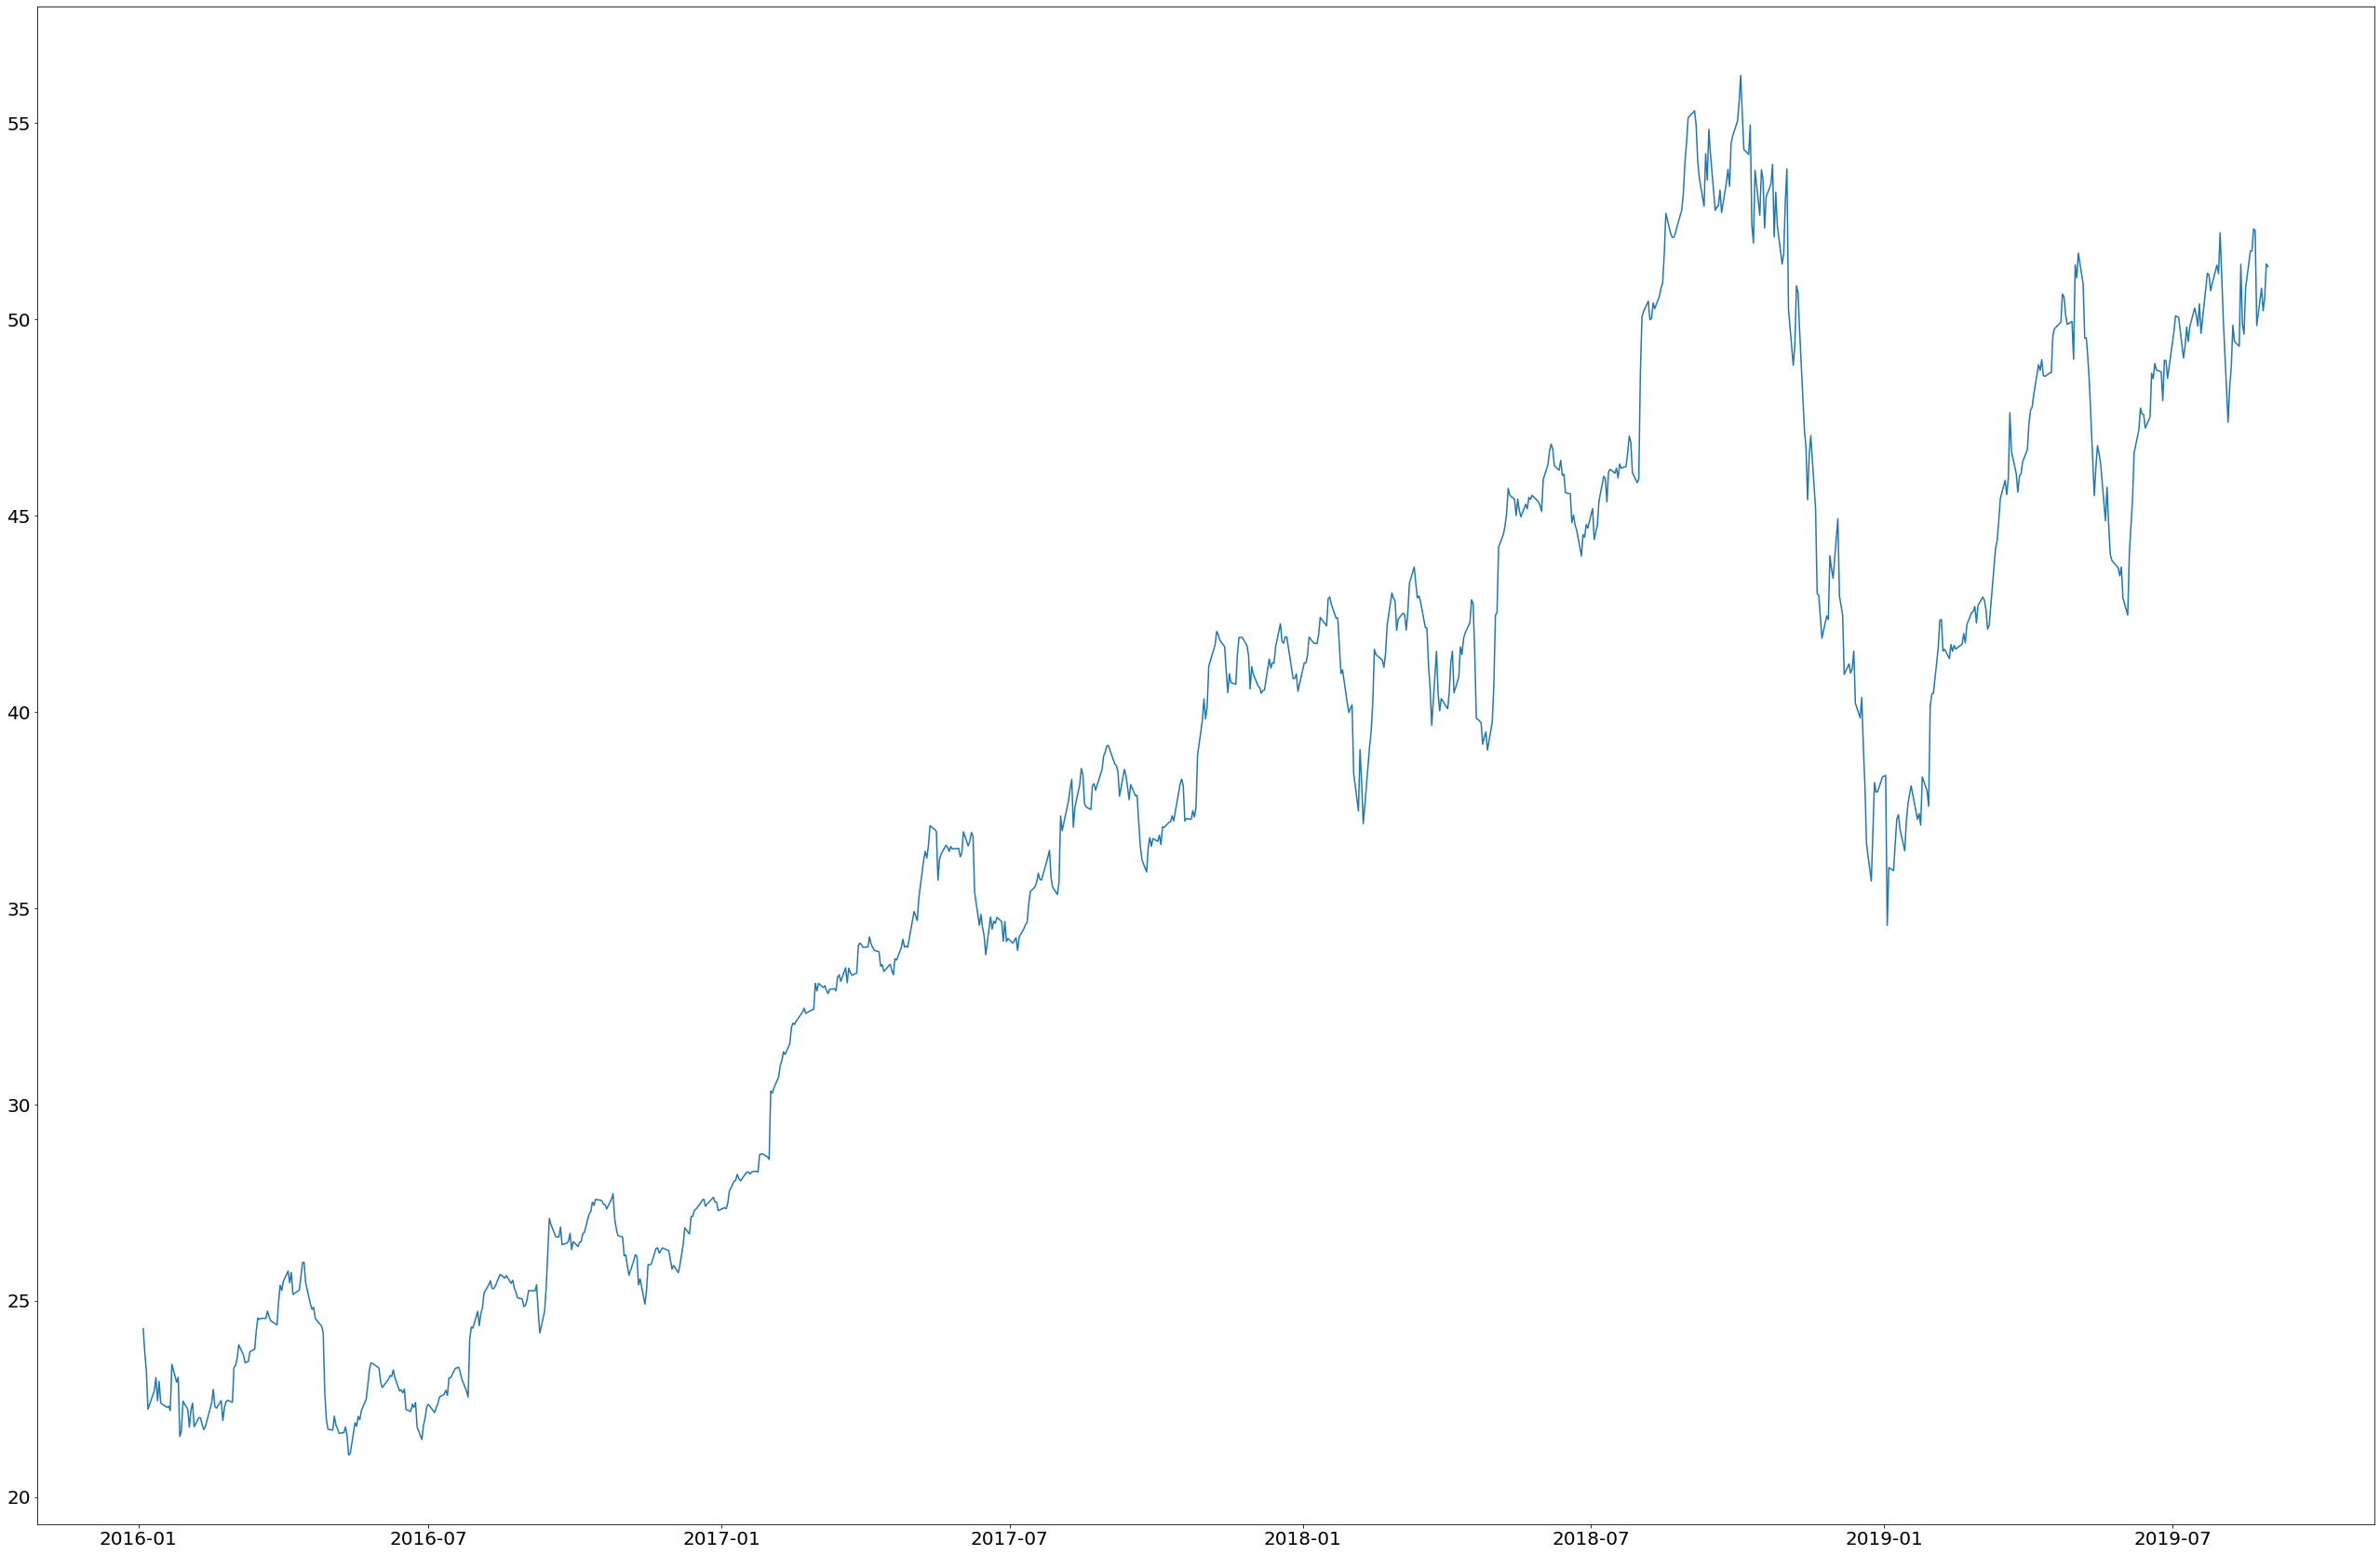

In [16]:
plt.plot(appl['Adj Close'])

# Differencing to make stationary

In [17]:
#logappl = np.log(appl['Close'])
appl['Adj Close'].diff()
rappl =appl['Adj Close'].diff()

In [18]:
rappl = rappl.replace(np.nan, 0)

In [19]:
rappl = pd.DataFrame(rappl)

In [20]:
rappl

,Adj Close
Date,
2016-01-04,0.000000
2016-01-05,-0.608614
2016-01-06,-0.463375
2016-01-07,-0.979775
2016-01-08,0.117573
...,...
2019-08-26,0.946953
2019-08-27,-0.573093
2019-08-28,0.336967


In [21]:
dftest = adfuller(rappl, autolag = 'AIC')

In [22]:
print("1. ADF: ", dftest[0])
print("2. P-value: ", dftest[1])
print("3. Num of Lags: ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ")
for key, val in dftest[4].items():
    print("\t", key, val)

1. ADF:  -9.192767535624254
2. P-value:  2.1015383446716813e-15
3. Num of Lags:  8
4. Num of Observations used for ADF Regression and Critical Values Calculations:  913
5. Critical Values: 
	 1% -3.4375326734225844
	 5% -2.8647108493902986
	 10% -2.568458364370556


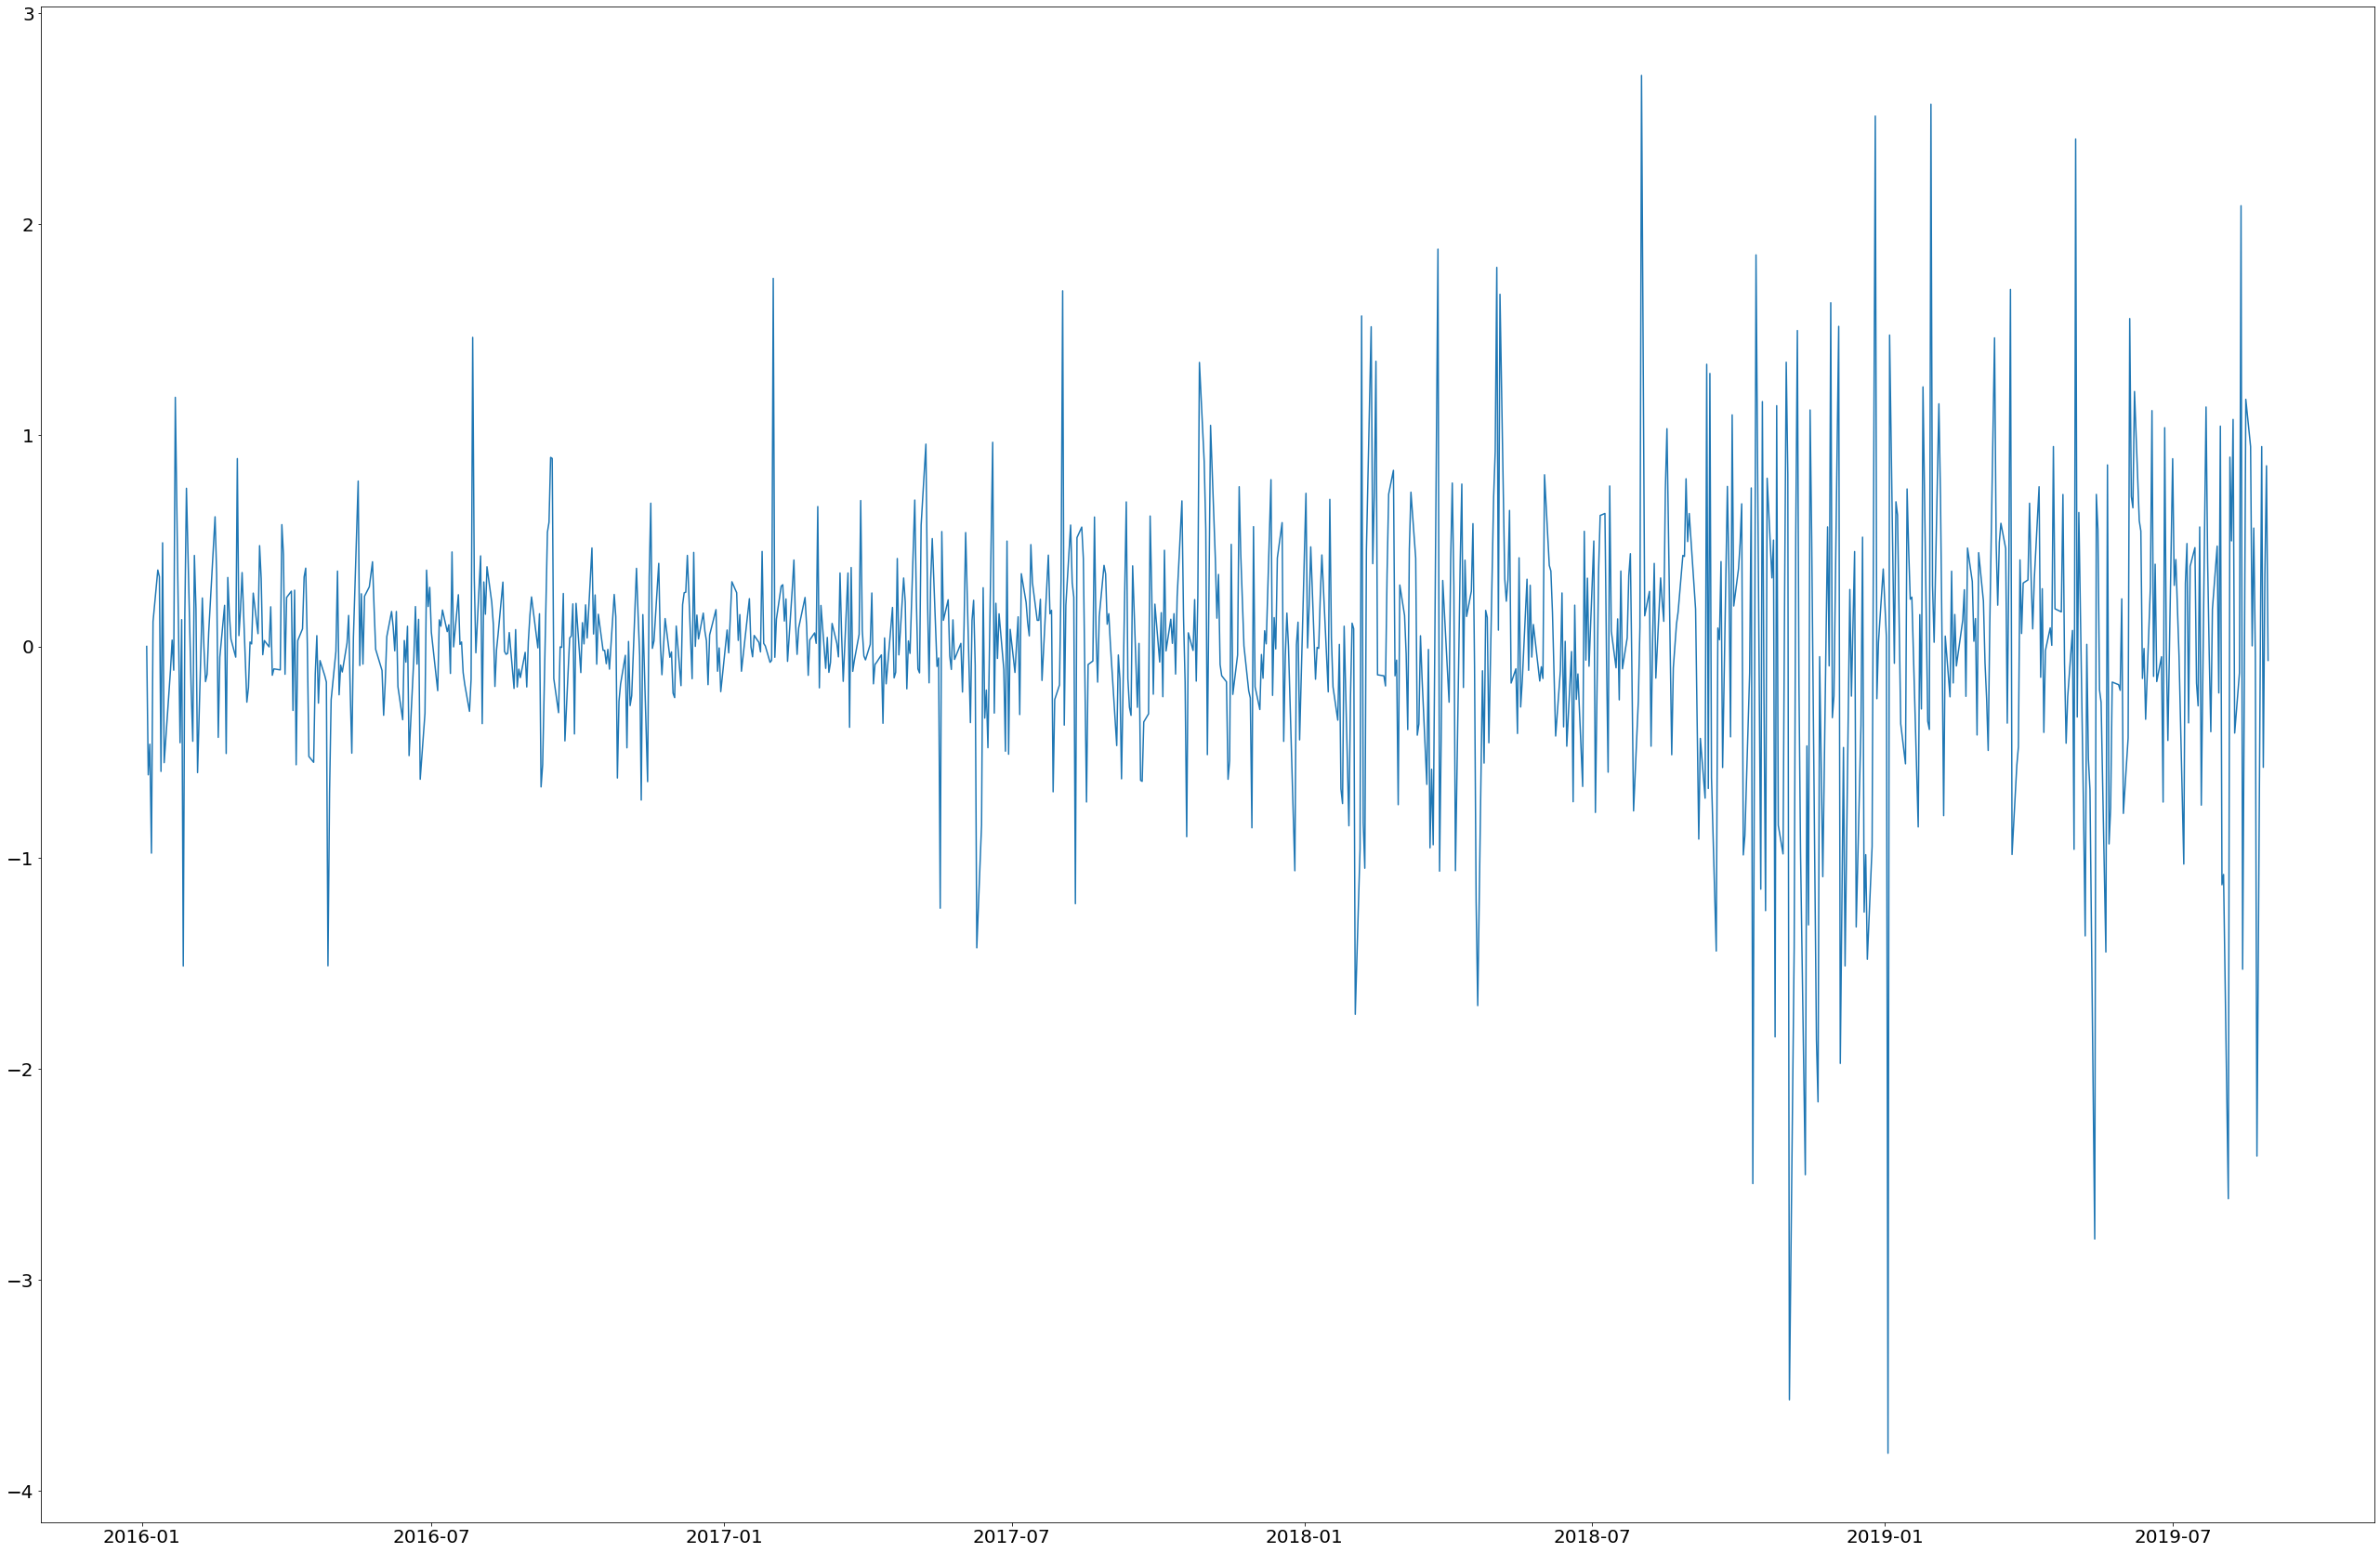

In [23]:
plt.plot(rappl)

# Finding ideal ARIMA order

In [24]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [25]:
ideal_fit = auto_arima(appl['Adj Close'], exog=appl['ts_polarity'], trace=True, supress_warnings=True)
ideal_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1730.073, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1732.072, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1732.072, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1730.154, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1733.790, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.175 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  922
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -863.037
Date:                Fri, 10 Dec 2021   AIC                           1730.073
Time:                        17:12:59   BIC                           1739.724
Sample:                             0   HQIC                          1733.756
                                - 922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0294      0.021      1.410      0.159      -0.011       0.070
sigma2         0.3815      0.009     41.332      0.000       0.363       0.400
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1334.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               6.61   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Model order (0,1,0)

In [27]:
# Create Training and Test
train = rappl.iloc[:-85]
test = rappl.iloc[-85:]

In [28]:
test

,Adj Close
Date,
2019-05-02,-0.334411
2019-05-03,0.634639
2019-05-06,-0.798172
2019-05-07,-1.371795
2019-05-08,0.009758
...,...
2019-08-26,0.946953
2019-08-27,-0.573093
2019-08-28,0.336967


In [29]:
model = ARIMA(train, order=(0,1,0), exog=appl['ts_polarity'].iloc[:-85])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  837
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1020.449
Date:                Fri, 10 Dec 2021   AIC                           2044.897
Time:                        17:12:59   BIC                           2054.354
Sample:                             0   HQIC                          2048.523
                                - 837                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ts_polarity     0.2130      0.697      0.306      0.760      -1.153       1.579
sigma2          0.6726      0.017     39.778      0.000       0.639       0.706
===================================================================================
Ljung-Box (L1) (Q):                 175.59   Jarque-Bera (JB):              1174.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.20   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

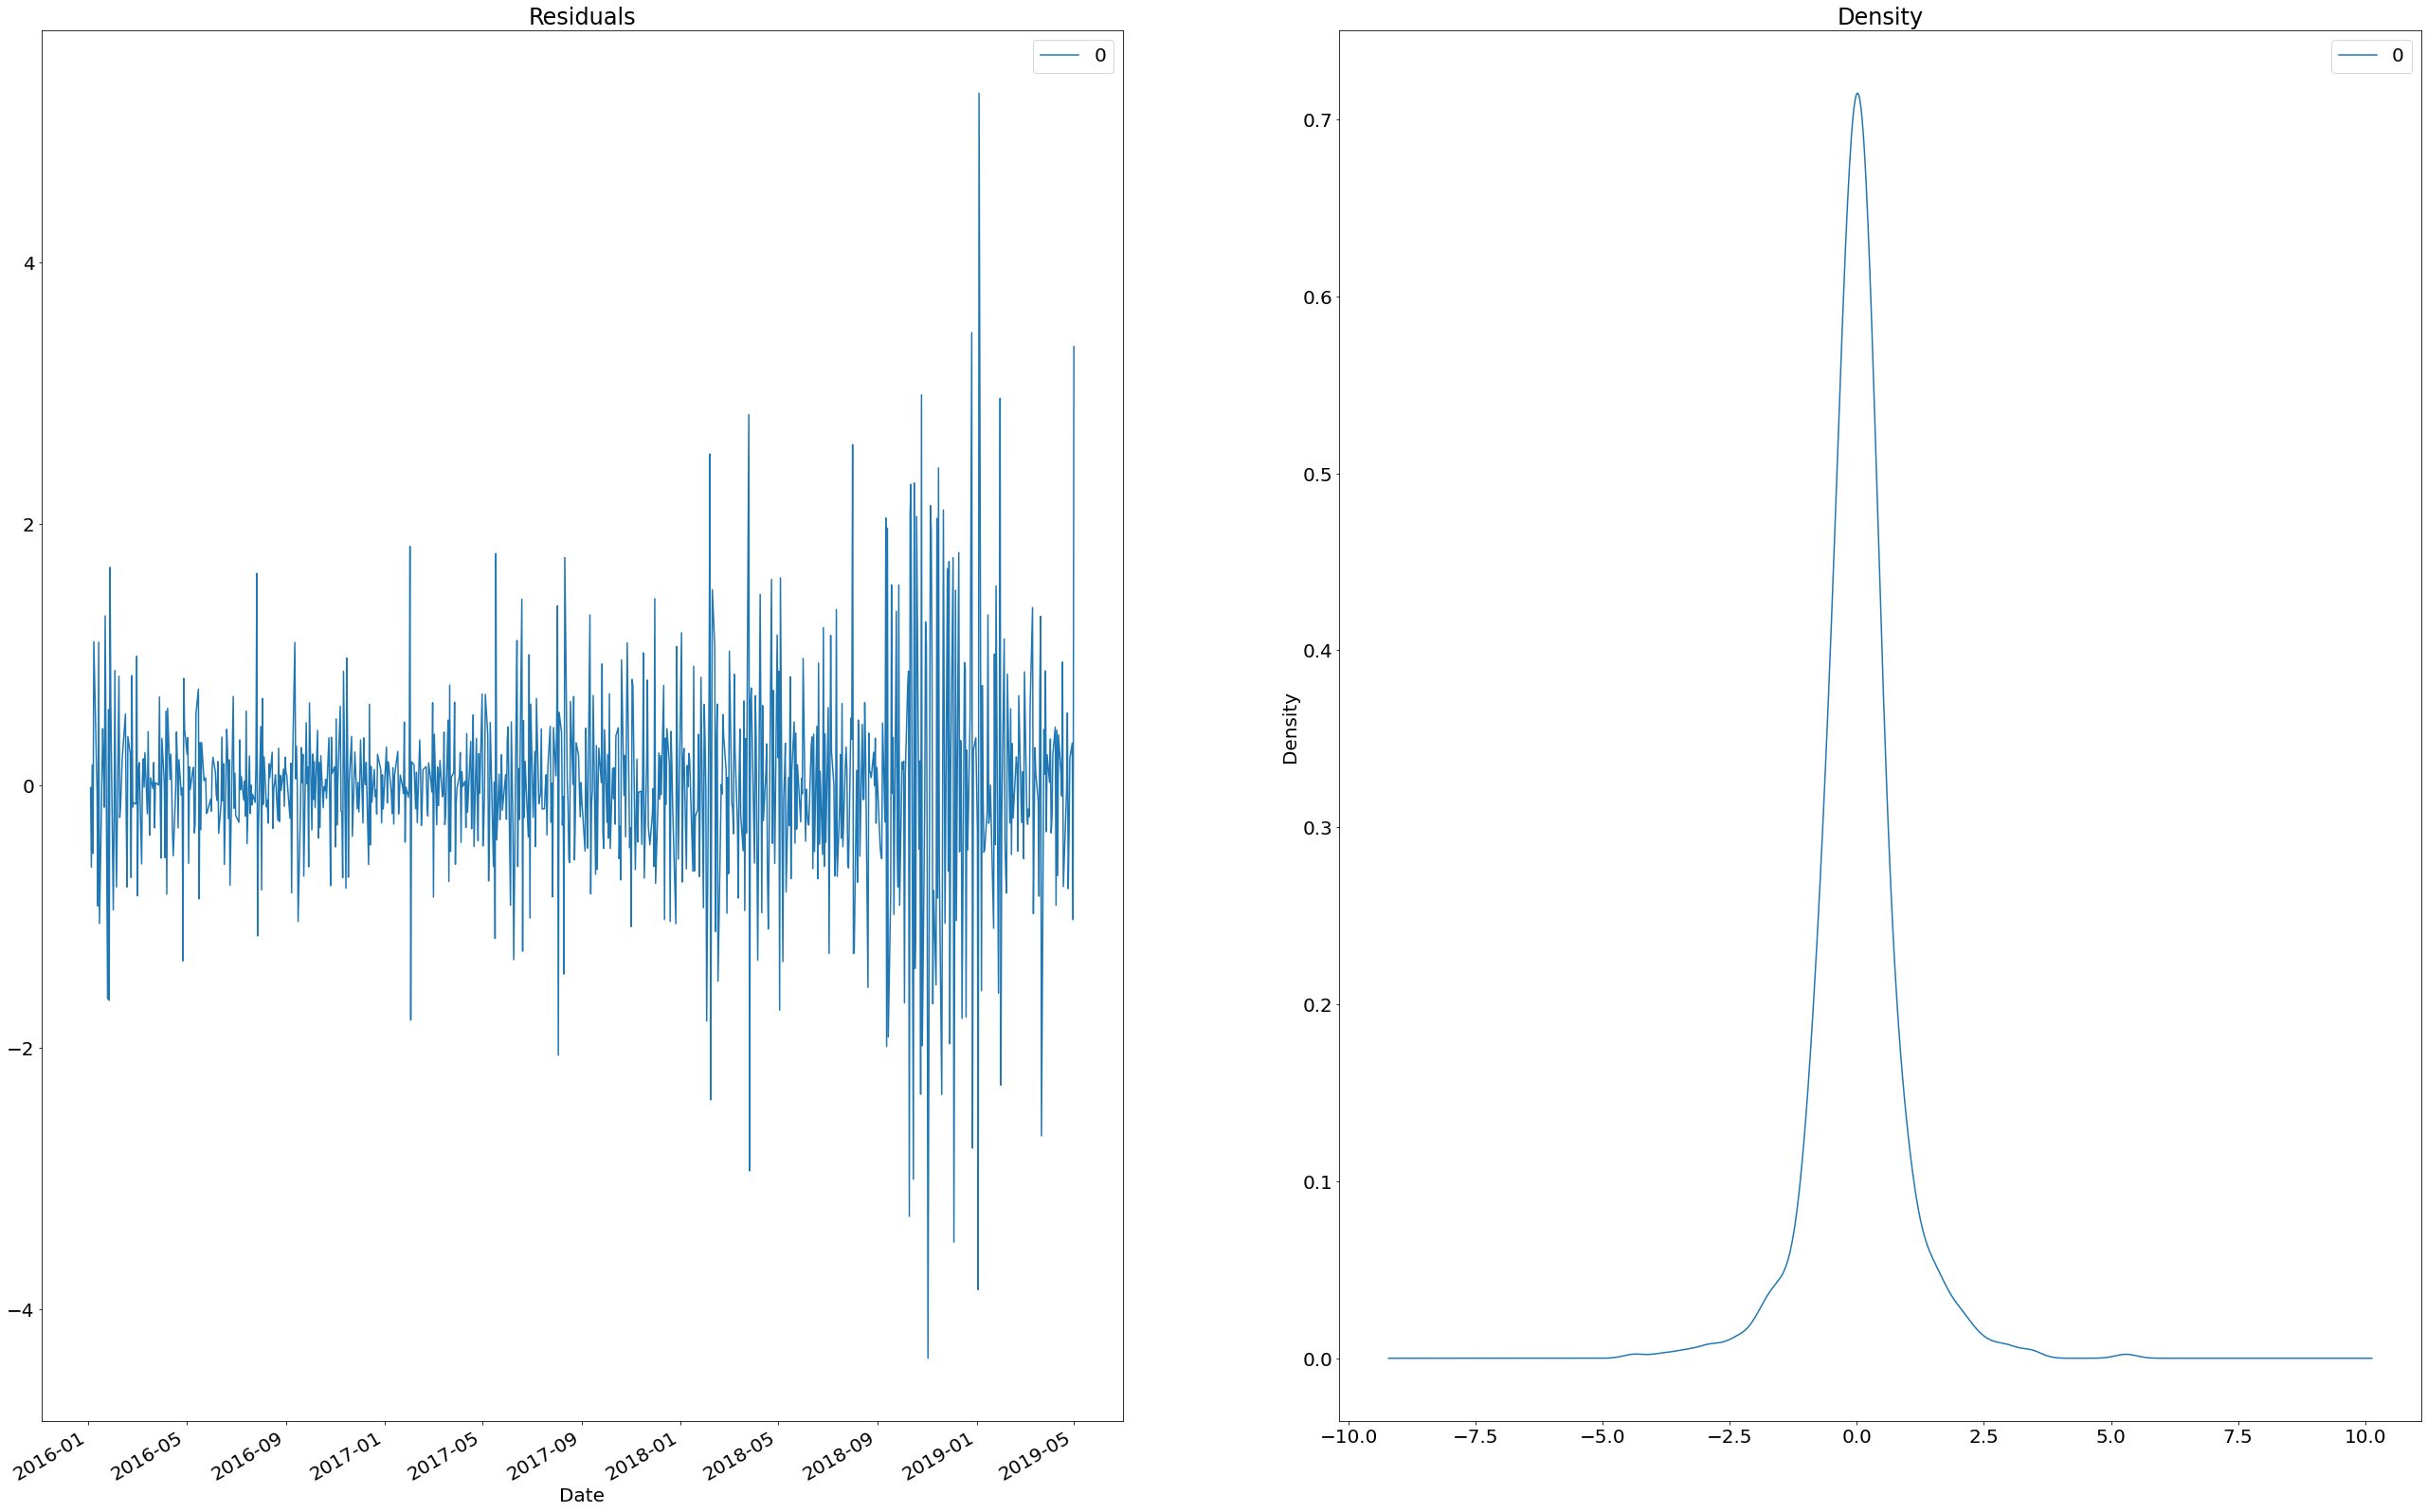

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [31]:
start='2016-01-04'
end='2019-05-01'

In [32]:
pred = model_fit.predict(start=start, end=end, dynamic=False)

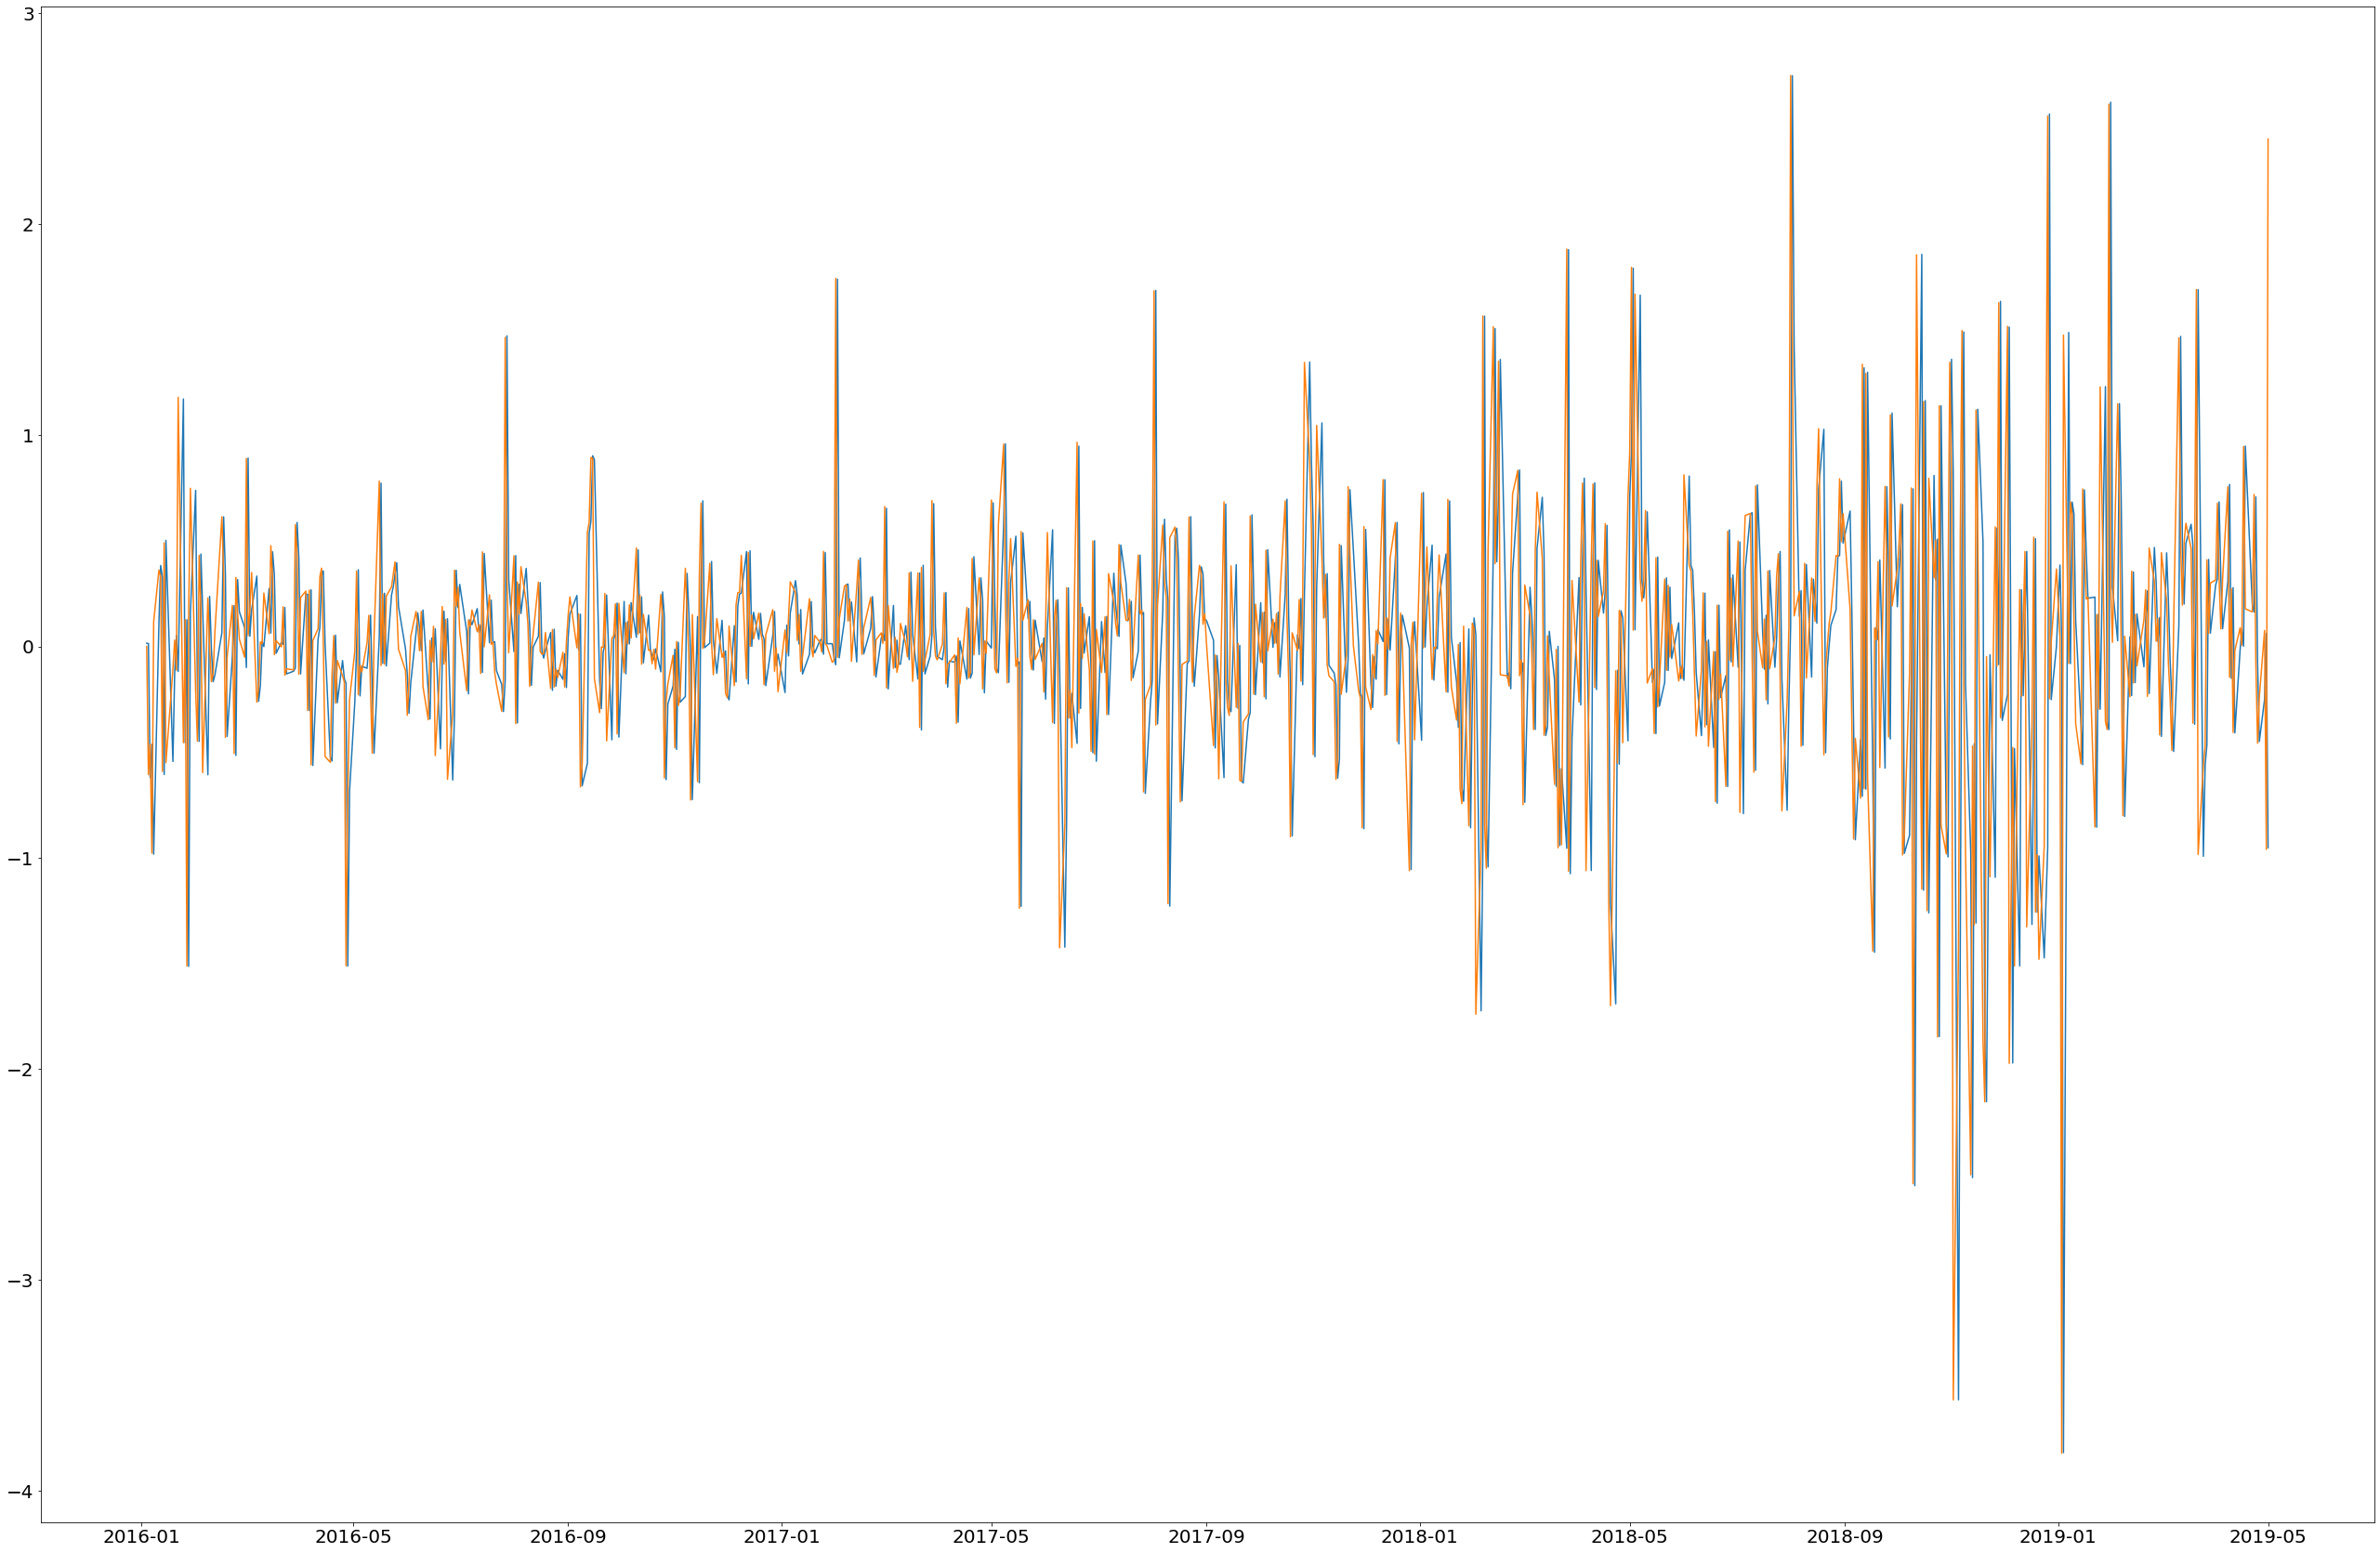

In [33]:
plt.plot(pred)
plt.plot(rappl.iloc[:-85])
plt.show()

In [34]:
# Create Training and Test
train = rappl.iloc[:-85]
test = rappl.iloc[-85:]

In [35]:
model_fit

In [36]:
forecast=model_fit.forecast(steps=85, exog=appl['ts_polarity'].iloc[-85:])

In [37]:
forecast=pd.DataFrame(forecast)

In [38]:
lenght=rappl.iloc[-85:]

In [39]:
index_future_dates = lenght.index

In [40]:
forecast=model_fit.forecast(steps=85, exog=appl['ts_polarity'].iloc[-85:])
forecast.index=index_future_dates
print(forecast)

Date
2019-05-02    2.406403
2019-05-03    2.408059
2019-05-06    2.406413
2019-05-07    2.420141
2019-05-08    2.419377
                ...   
2019-08-26    2.399270
2019-08-27    2.408898
2019-08-28    2.396956
2019-08-29    2.395888
2019-08-30    2.406460
Name: predicted_mean, Length: 85, dtype: float64


<AxesSubplot:xlabel='Date'>

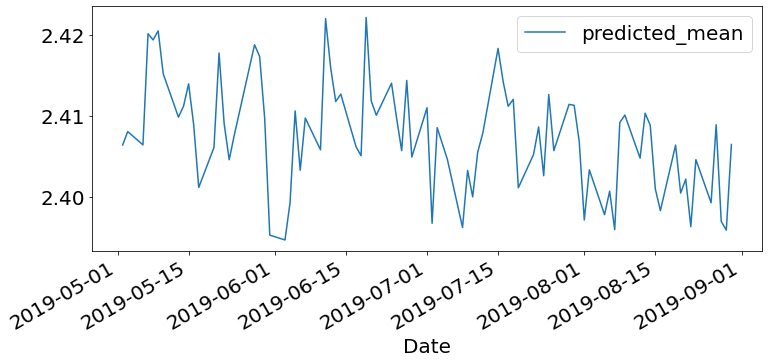

In [41]:
forecast.plot(figsize=(12,5),legend=True)

In [42]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import mse, rmse
print('Mean Squared Error:', (mean_squared_error(test, forecast)))

Mean Squared Error: 6.535510250289897


# Model 2 order (1,1,1)

In [43]:
model2 = ARIMA(train, order=(1,1,1), exog=appl['ts_polarity'].iloc[:-85])
model2_fit = model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  837
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.291
Date:                Fri, 10 Dec 2021   AIC                           1494.582
Time:                        17:13:01   BIC                           1513.497
Sample:                             0   HQIC                          1501.833
                                - 837                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ts_polarity     0.7408      0.547      1.355      0.175      -0.330       1.812
ar.L1           0.0126      0.025      0.508      0.612      -0.036       0.061
ma.L1          -1.0000      0.744     -1.343      0.179      -2.459       0.459
sigma2          0.3438      0.254      1.351      0.177      -0.155       0.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1556.93
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.74   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

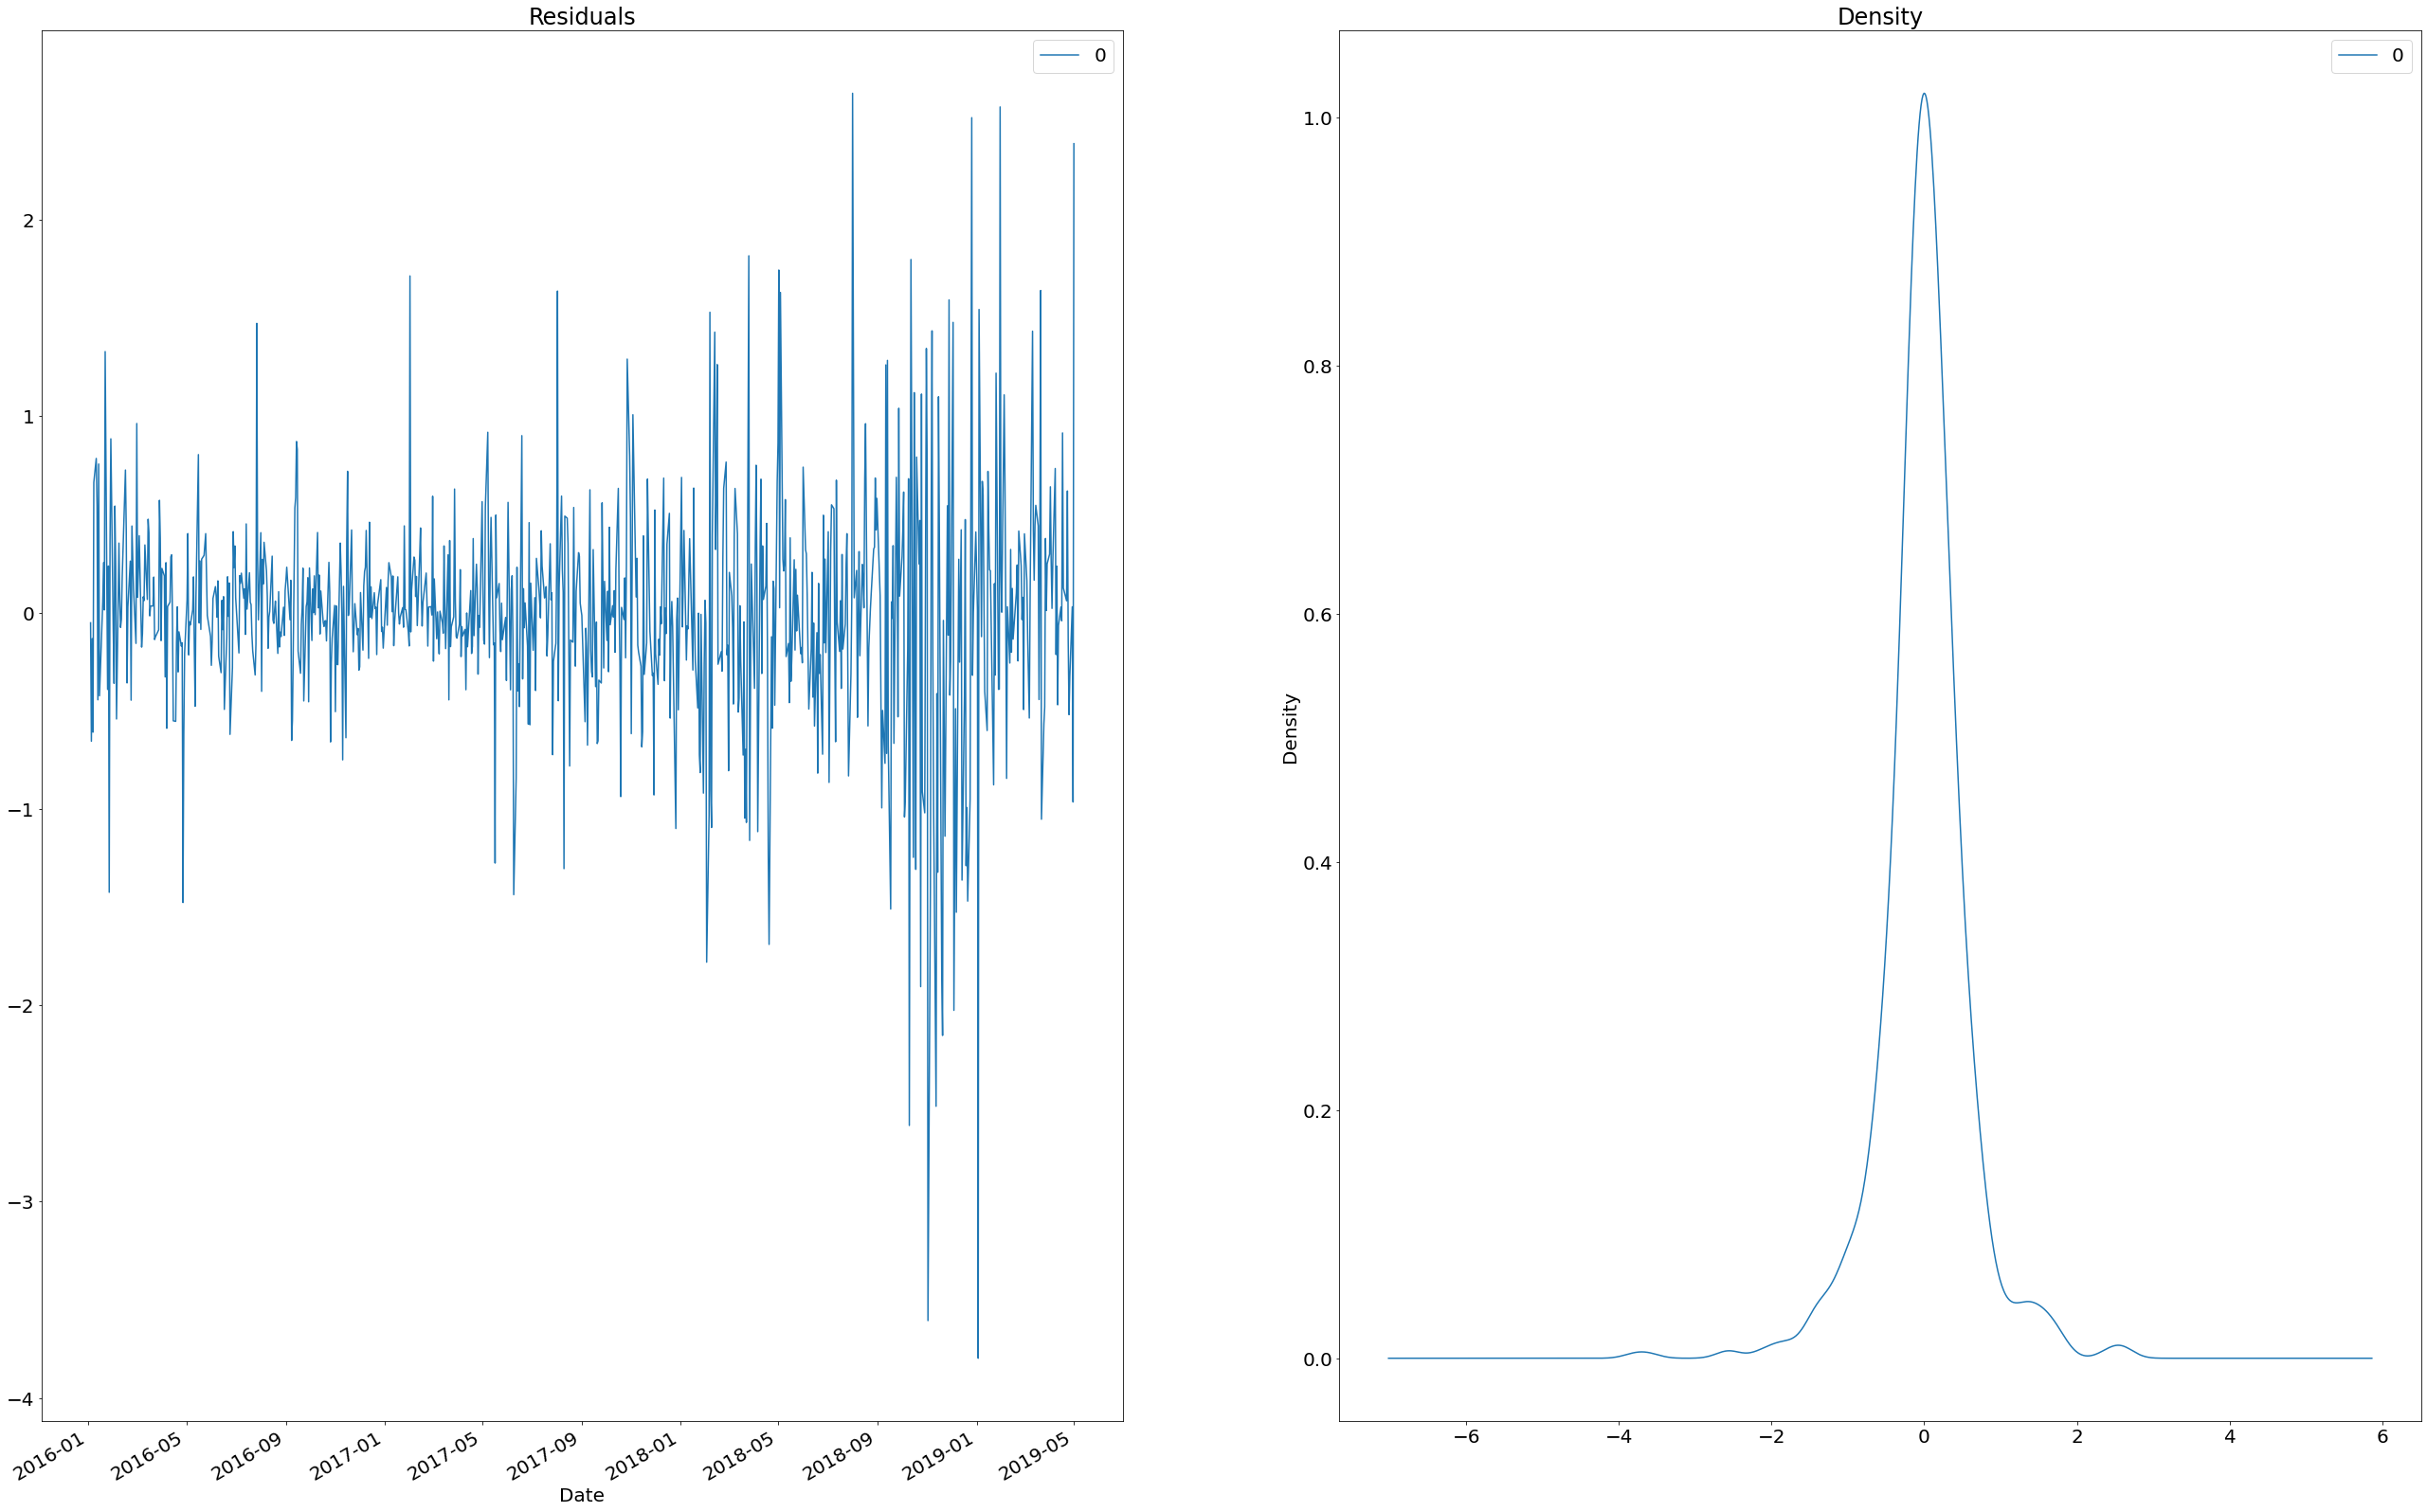

In [44]:
# Plot residual errors
residuals = pd.DataFrame(model2_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [45]:
pred2 = model2_fit.predict(start=start, end=end, dynamic=False)

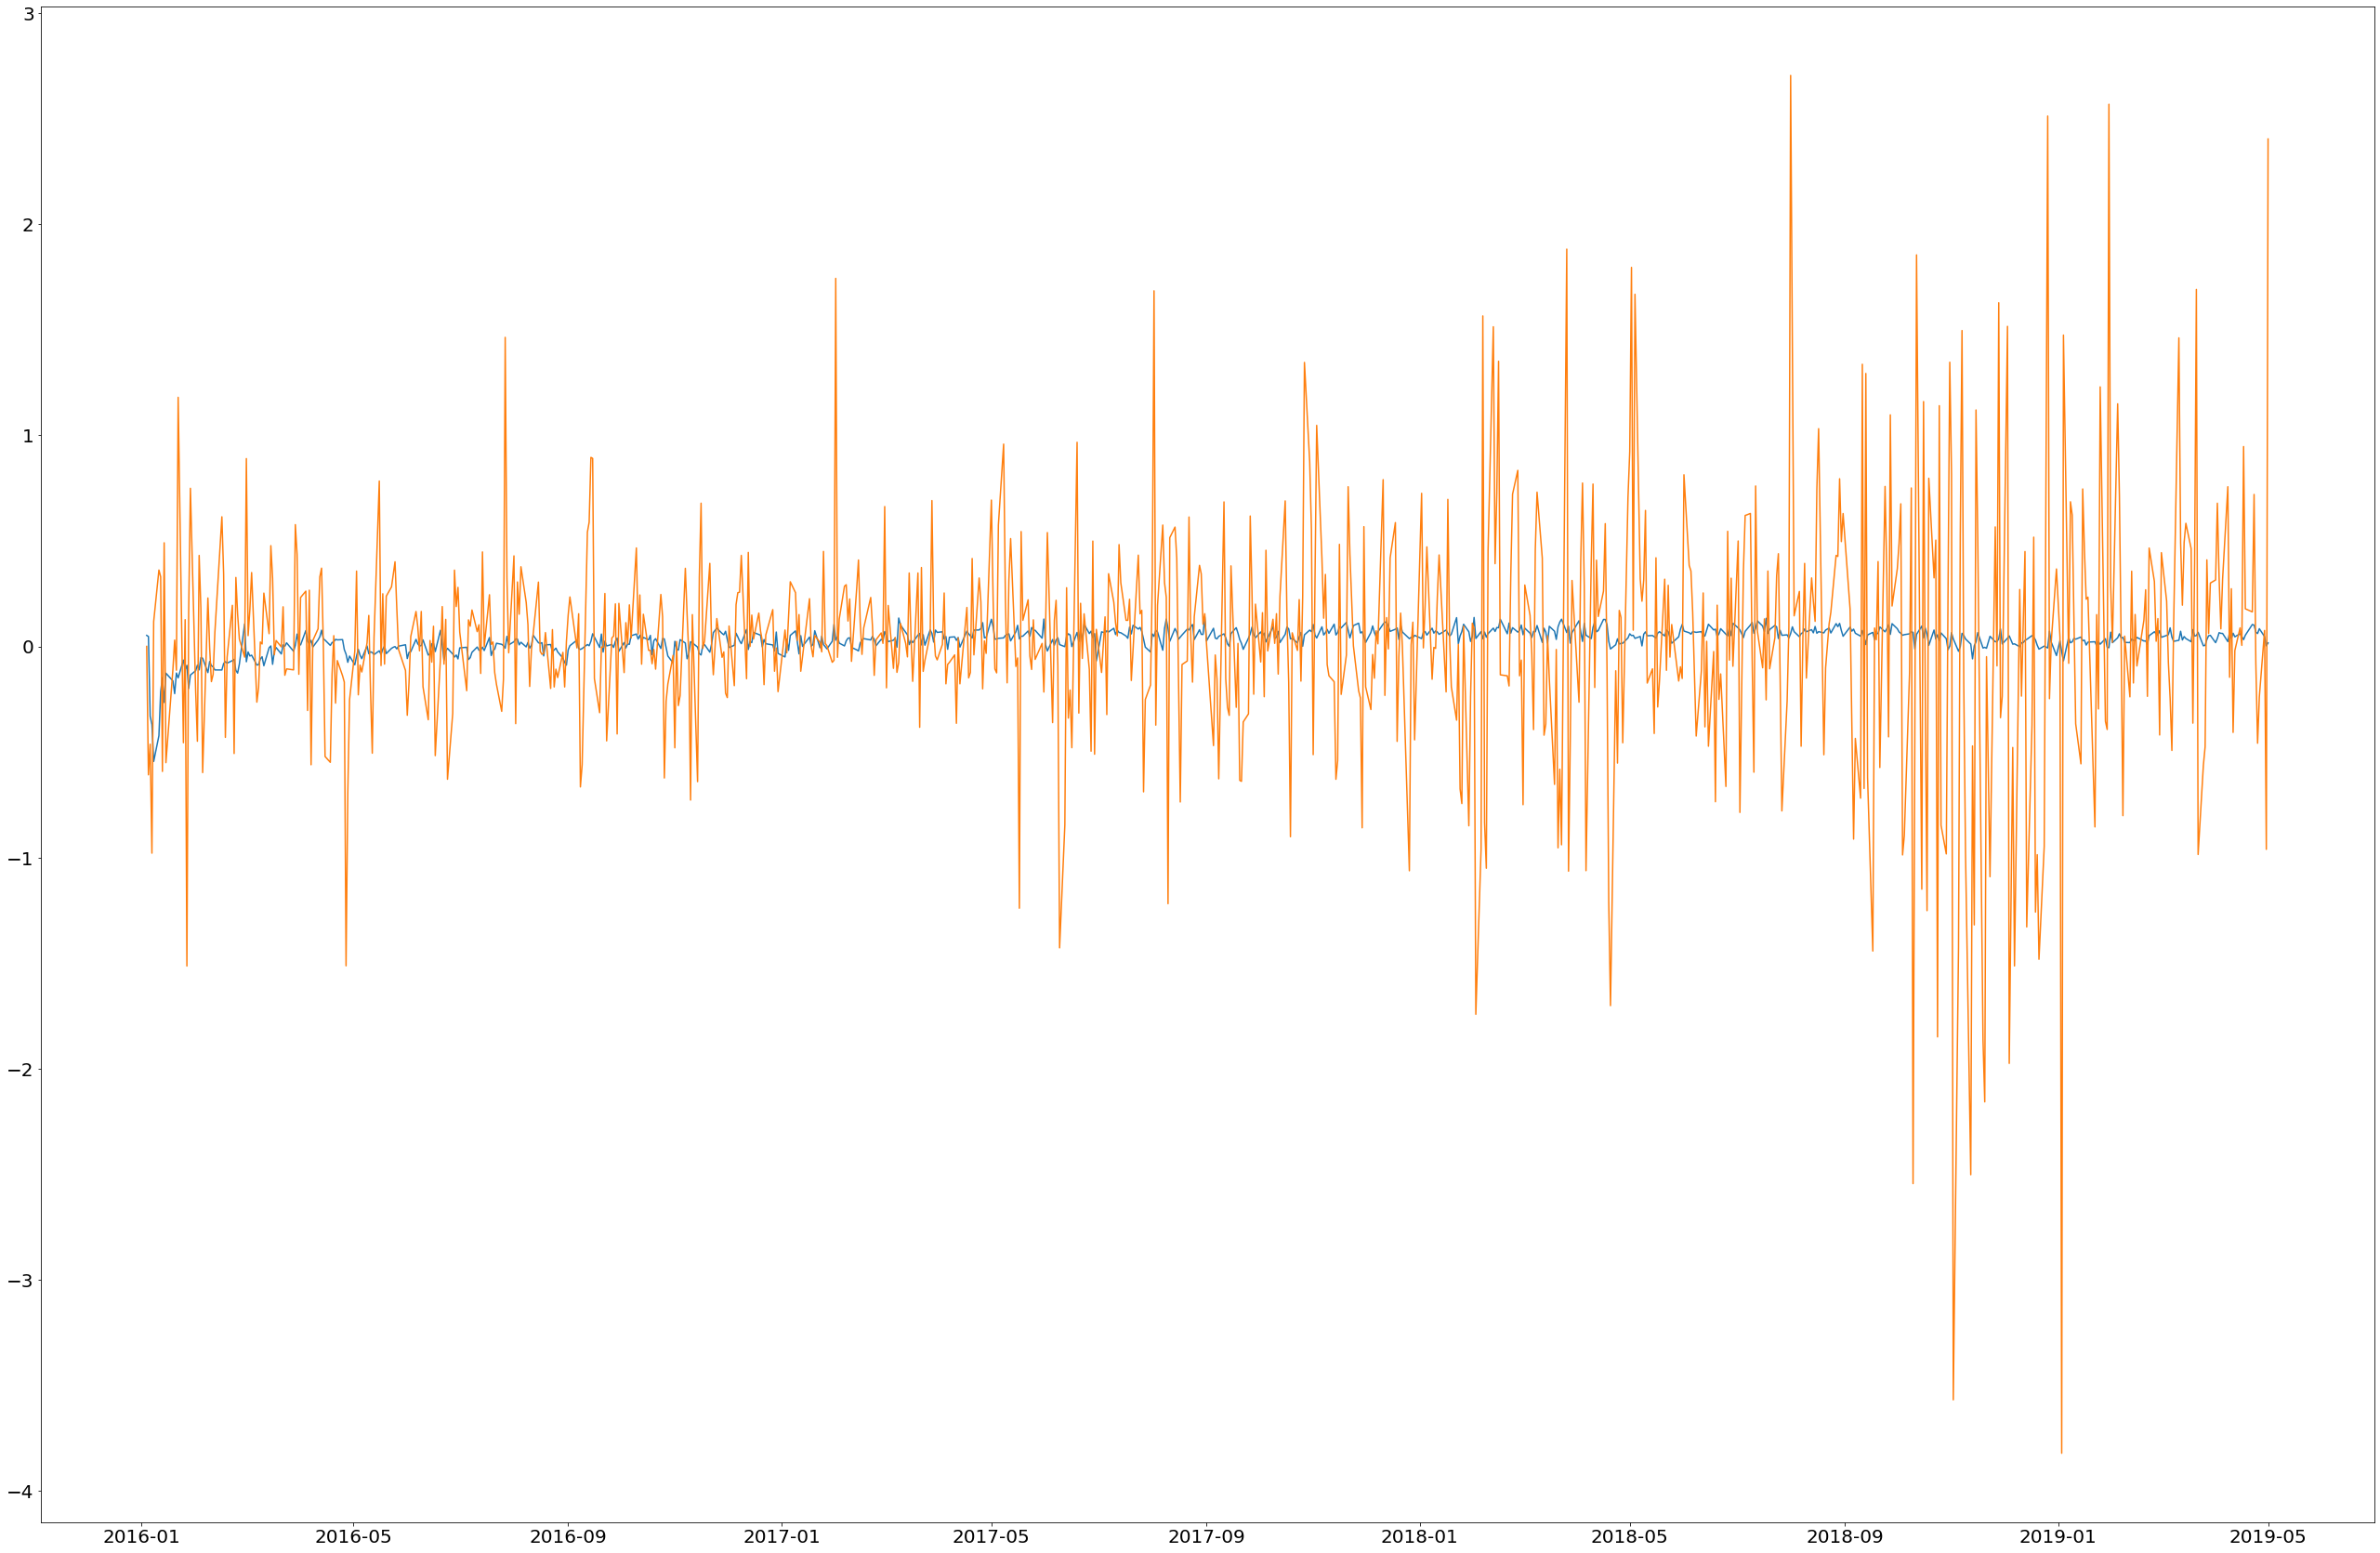

In [46]:
plt.plot(pred2)
plt.plot(rappl.iloc[:-85])
plt.show()

In [47]:
forecast2=model2_fit.forecast(steps=85, exog=appl['ts_polarity'].iloc[-85:])
forecast2.index=index_future_dates
print(forecast2)

Date
2019-05-02    0.068470
2019-05-03    0.044800
2019-05-06    0.038705
2019-05-07    0.086447
2019-05-08    0.083789
                ...   
2019-08-26    0.013857
2019-08-27    0.047342
2019-08-28    0.005809
2019-08-29    0.002093
2019-08-30    0.038863
Name: predicted_mean, Length: 85, dtype: float64


<AxesSubplot:xlabel='Date'>

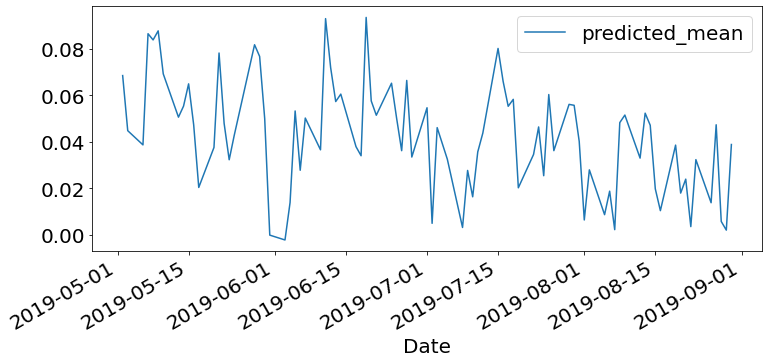

In [48]:
forecast2.plot(figsize=(12,5),legend=True)

In [49]:
print('Mean Squared Error:', (mean_squared_error(test, forecast2)))

Mean Squared Error: 0.7398843366731328


# Model 3 order (2,1,2)

In [50]:
model3 = ARIMA(train, order=(2,1,2), exog=appl['ts_polarity'].iloc[:-85])
model3_fit = model3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  837
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -742.574
Date:                Fri, 10 Dec 2021   AIC                           1497.149
Time:                        17:13:03   BIC                           1525.520
Sample:                             0   HQIC                          1508.025
                                - 837                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ts_polarity     0.7459      0.542      1.376      0.169      -0.317       1.809
ar.L1          -0.8316      0.202     -4.115      0.000      -1.228      -0.435
ar.L2          -0.0117      0.029     -0.411      0.681      -0.068       0.044
ma.L1          -0.1537      0.201     -0.764      0.445      -0.548       0.241
ma.L2          -0.8461      0.208     -4.077      0.000      -1.253      -0.439
sigma2          0.3431      0.015     22.153      0.000       0.313       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1528.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.74   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

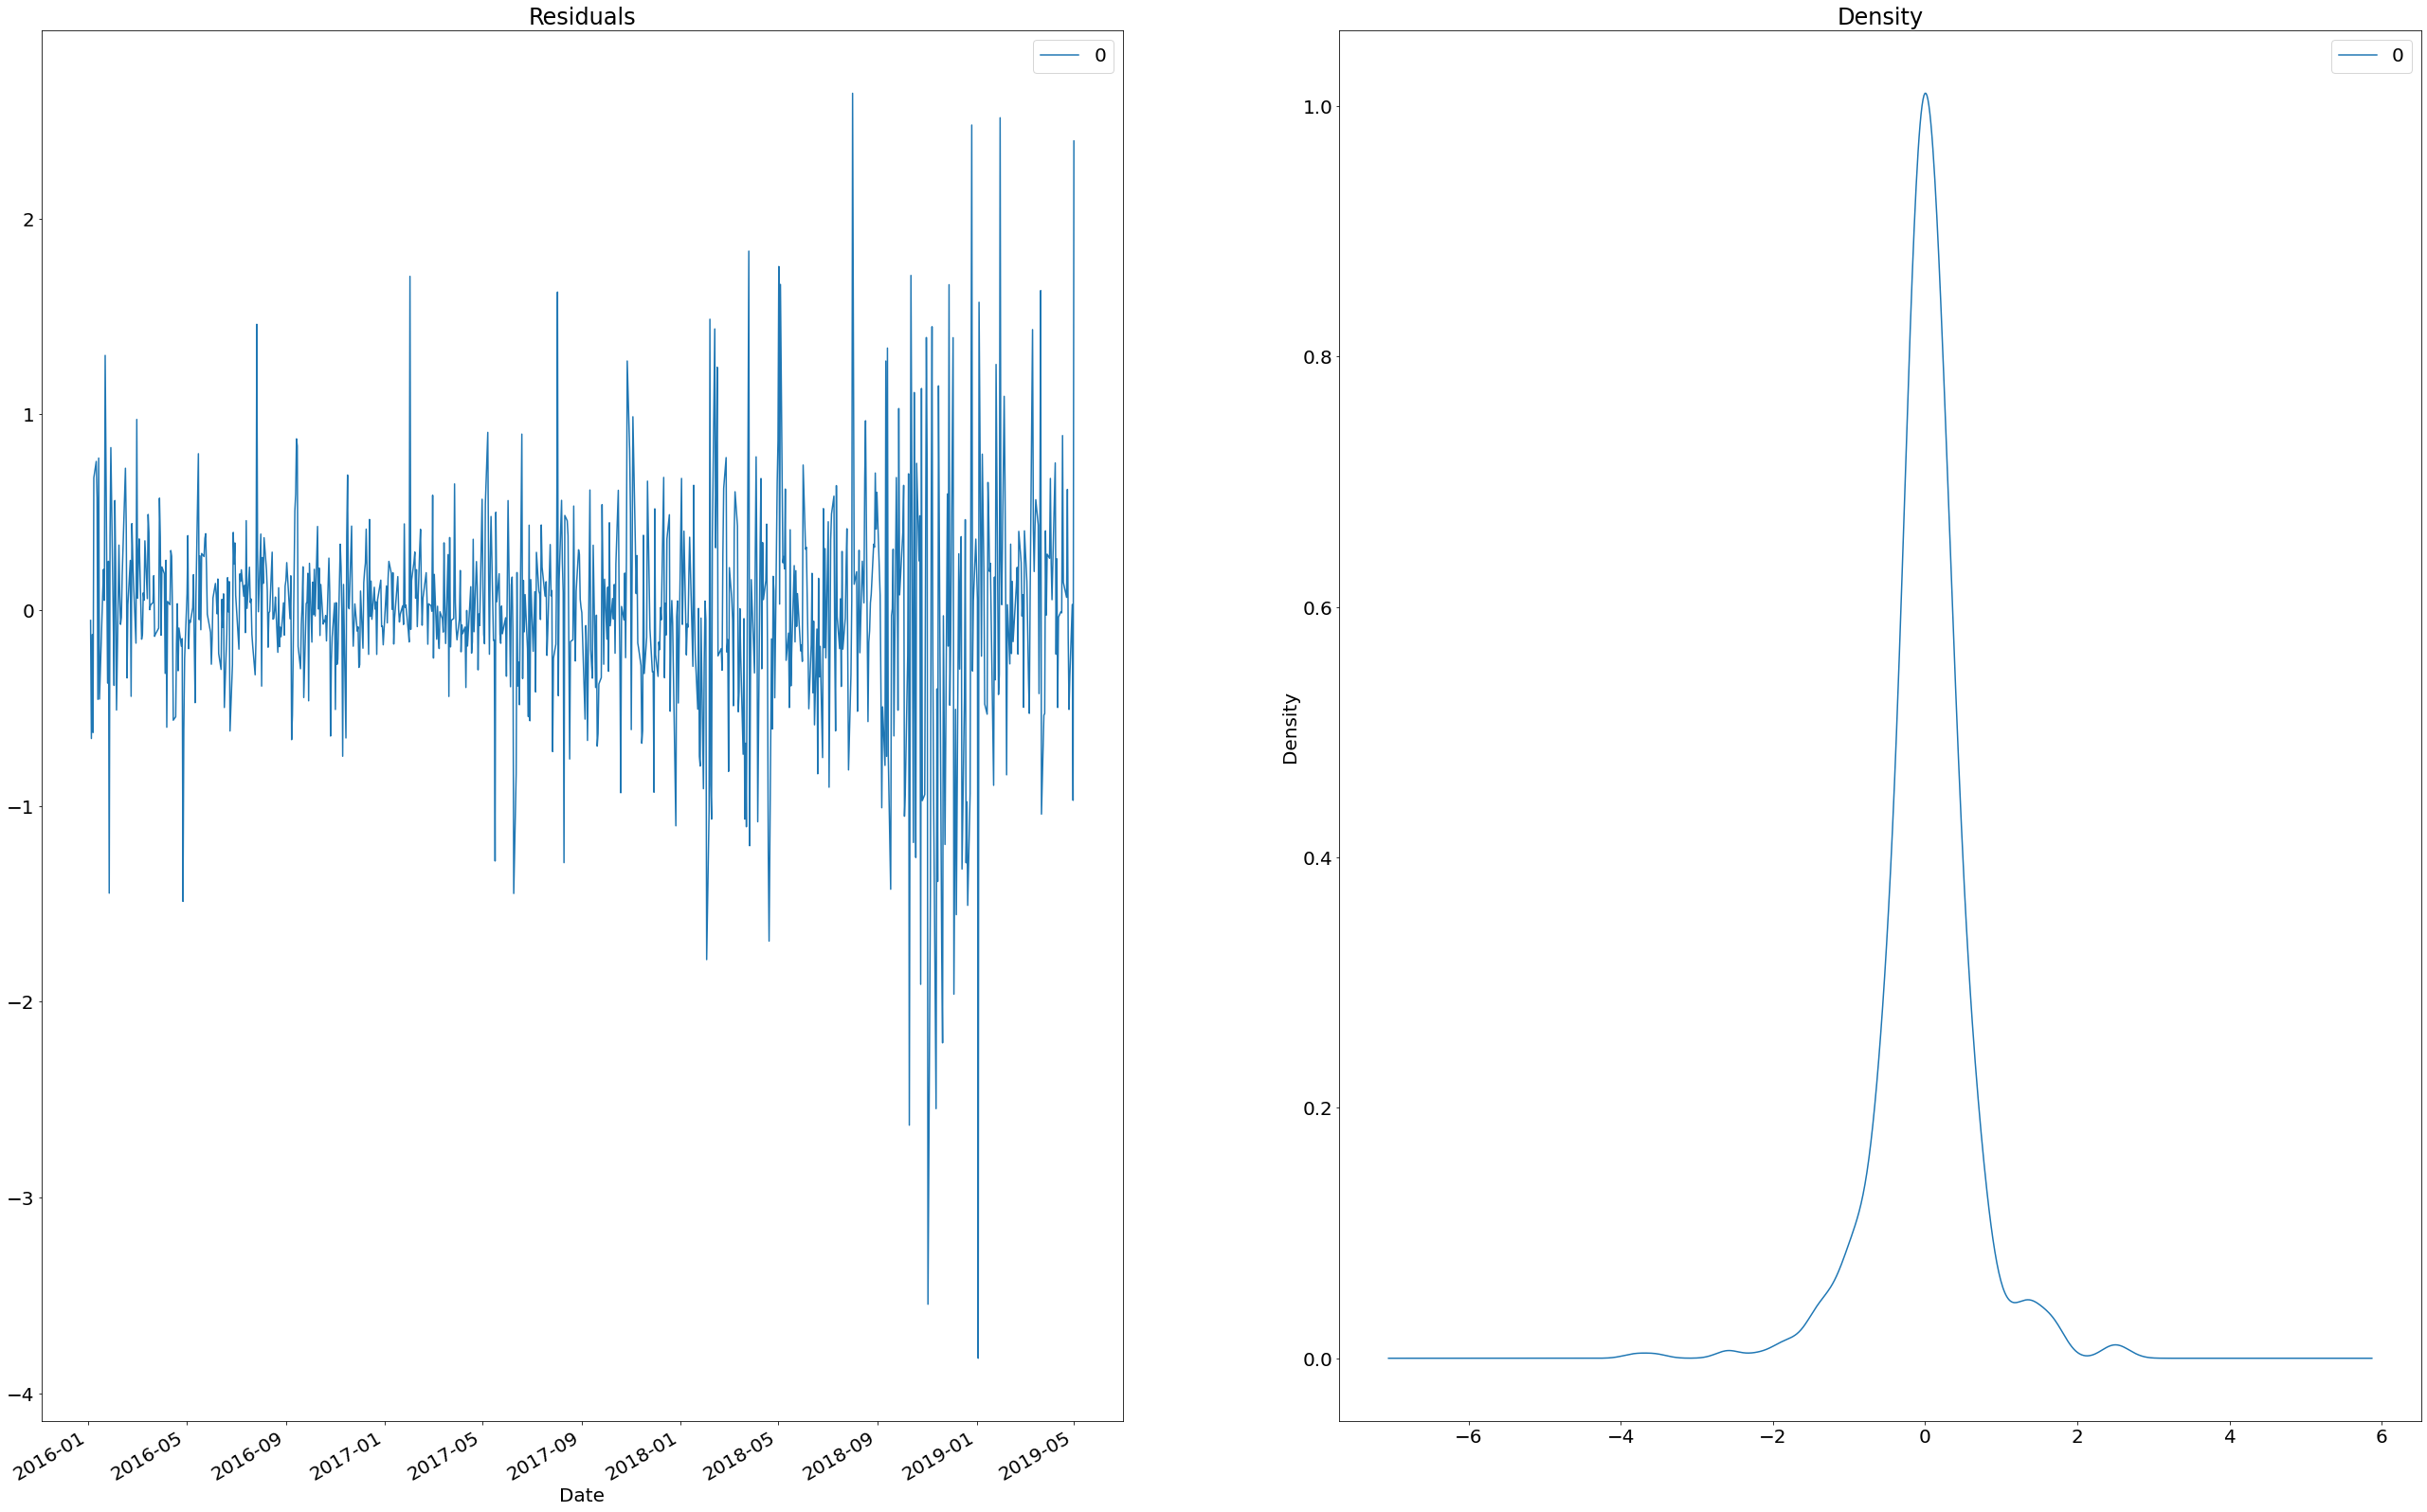

In [51]:
residuals = pd.DataFrame(model3_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [52]:
pred3 = model3_fit.predict(start=start, end=end, dynamic=False)

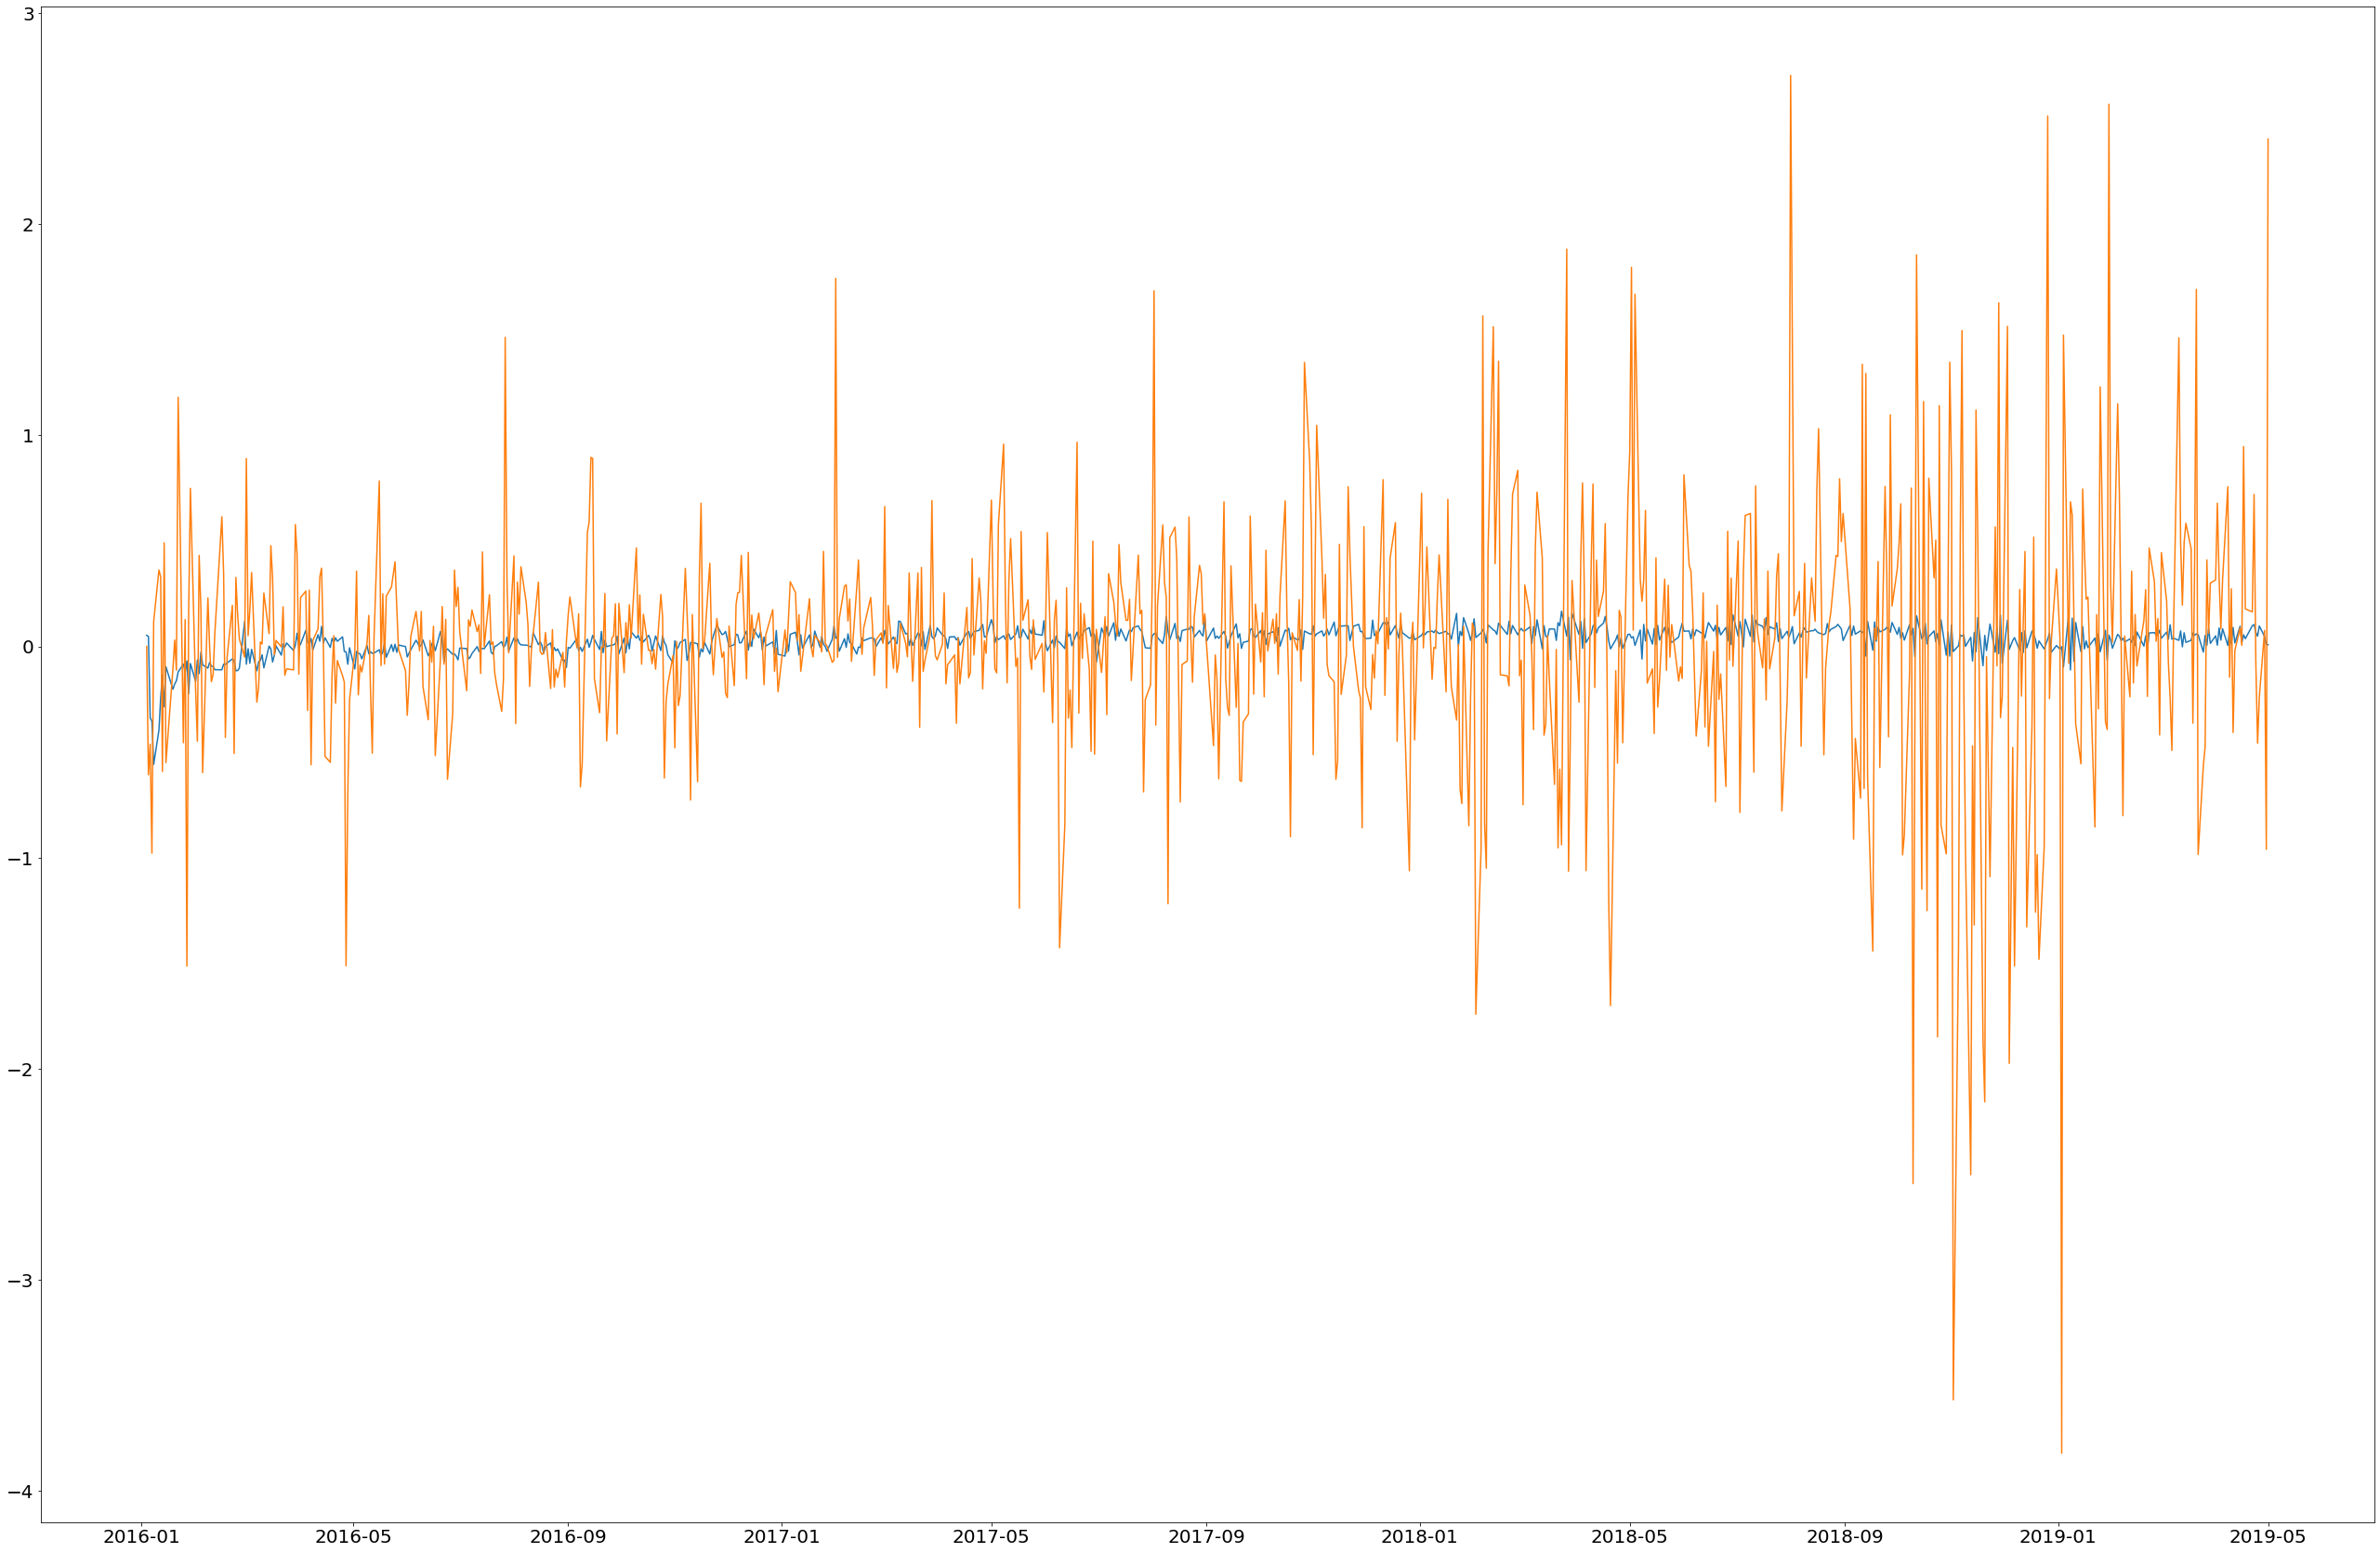

In [53]:
plt.plot(pred3)
plt.plot(rappl.iloc[:-85])
plt.show()

In [54]:
forecast3=model3_fit.forecast(steps=85, exog=appl['ts_polarity'].iloc[-85:])
forecast3.index=index_future_dates
print(forecast3)

Date
2019-05-02    0.102203
2019-05-03   -0.036127
2019-05-06    0.105029
2019-05-07    0.032623
2019-05-08    0.128415
                ...   
2019-08-26    0.013715
2019-08-27    0.047432
2019-08-28    0.005611
2019-08-29    0.001869
2019-08-30    0.038895
Name: predicted_mean, Length: 85, dtype: float64


<AxesSubplot:xlabel='Date'>

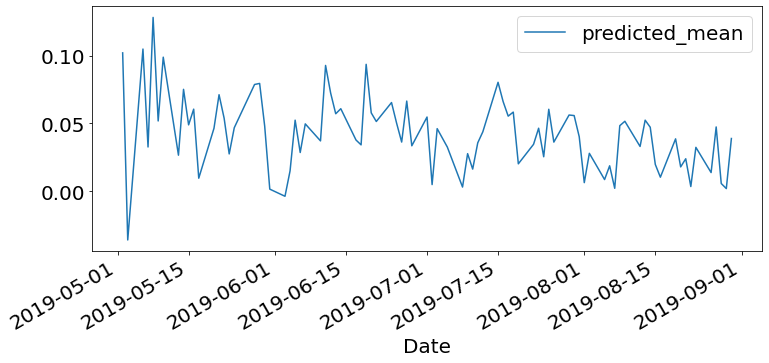

In [55]:
forecast3.plot(figsize=(12,5),legend=True)

In [56]:
print('Mean Squared Error:', (mean_squared_error(test, forecast3)))

Mean Squared Error: 0.739860966964554
